<a href="https://colab.research.google.com/github/0hanka07/MyFirstRepo/blob/main/Copy_of_Data_science_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
import json
import pickle
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

from matplotlib import pyplot as plt

**Load Data**

In [3]:
# from tensorflow.keras.optimizer import SGD
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()

intents = json.loads(open('/content/drive/MyDrive/Colab Notebooks/intents2.json').read())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**create bag of words**

In [4]:
words = []
classes = []
documents = []
ignore_letters=['?','!','.','/','@']

for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list,intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

stop_words = set(stopwords.words('english'))
words = [lemmatizer.lemmatize(word) for word in words if word not in ignore_letters]
words = sorted(set(words))

classes = sorted(set(classes))

pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))


**prepare data for training**

In [5]:
training = []
output_empty = [0] * len(classes)
for document in documents:
    bag=[]
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training, dtype=object)

train_x = list(training[:, 0])
train_y = list(training[:, 1])


**Create model**

In [6]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))
# gradient_descent_v2.
sgd = SGD(learning_rate=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Train model**

Epoch 1/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0227 - loss: 4.1833
Epoch 2/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0866 - loss: 3.8026
Epoch 3/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1960 - loss: 3.2634
Epoch 4/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3333 - loss: 2.8139
Epoch 5/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4020 - loss: 2.4798
Epoch 6/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4642 - loss: 2.1175
Epoch 7/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5193 - loss: 1.9851
Epoch 8/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5935 - loss: 1.7266
Epoch 9/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5953 - loss: 1.5659
Epoch 10/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6655 - loss: 1.3668
Epoch 11/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6670 - loss: 1.4054
Epoch 12/200
148/148 ━━━━━━━━━━━━━━━━━━━━

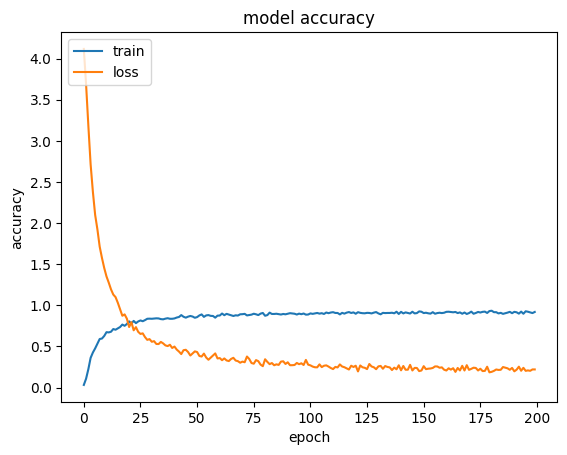

In [8]:

hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

model.save('chatbot_model.keras', hist)
#print('Done')

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

**Save trained model**

In [9]:
trained_model = load_model("/content/chatbot_model.keras")

#This part will need to be split from the above. So we will have 1st part to train the model and 2nd to run it.

**run chatbot**

In [ ]:

lemmatizer = WordNetLemmatizer()
intents = json.loads(open('/content/drive/MyDrive/Colab Notebooks/intents2.json').read())

words = pickle.load(open('words.pkl', 'rb'))
classes = pickle.load(open('classes.pkl', 'rb'))
model = load_model('chatbot_model.keras')

#Clean up the sentences
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word) for word in sentence_words]
    return sentence_words

#Converts the sentences into a bag of words
def bag_of_words(sentence):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(words)
    for w in sentence_words:
        for i, word in enumerate(words):
            if word == w:
                bag[i] = 1
    return np.array(bag)

def predict_class(sentence):
    bow = bag_of_words(sentence) #bow: Bag Of Words, feed the data into the neural network
    res = model.predict(np.array([bow]))[0] #res: result. [0] as index 0
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({'intent': classes[r[0]], 'probability': str(r[1])})
    return return_list


def get_response(intents_list, intents_json):
    tag = intents_list[0]['intent']
    list_of_intents = intents_json['intents']
    result = None # Initialize result to handle cases where no matching tag is found
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result # Return the result, which may be None if no matching tag was found
print("Data Science Helper Chatbot is here!")



while True:
    message = input("You: ")
    if message.strip().upper() == 'Q':
        print("Goodbye!")
        break
    ints = predict_class(message)
    print(ints)
    res = get_response(ints, intents)
    print(res)


Data Science Helper Chatbot is here!
You: Hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[{'intent': 'greeting', 'probability': '0.49990144'}, {'intent': 'goodbye', 'probability': '0.41763508'}]
Good to see you! How may I help you?
You: linear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[{'intent': 'linear_regression', 'probability': '0.9978763'}]
Linear regression can be applied in various fields, such as economics, finance, biology, and social sciences, to analyze and model relationships in data.
